In [17]:
import pandas as pd
import numpy as np
import pylab 
import matplotlib.pyplot as plt
from collections import Counter
import re

#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error


In [18]:
plt.rcParams['figure.figsize'] = [20, 5]

In [19]:
data =  pd.read_csv ('ETHUSDT.csv')
# data = pd.read_csv ('BTCUSDT.csv')
data.head()

,Open Time,Open Time.1,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-08-17,2017-08-17 00:00:00.000000000,301.13,312.18,298.00,302.00,7030.71034,2017-08-17 23:59:59.999000064,2.154655e+06,4522,6224.58999,1.908705e+06,50579.872288
1,2017-08-18,2017-08-18 00:00:00.000000000,302.00,311.79,283.94,293.96,9537.84646,2017-08-18 23:59:59.999000064,2.858947e+06,5658,7452.43542,2.240813e+06,55329.574324
2,2017-08-19,2017-08-19 00:00:00.000000000,293.31,299.90,278.00,290.91,2146.19773,2017-08-19 23:59:59.999000064,6.200226e+05,1795,1537.97550,4.447136e+05,58005.171046
3,2017-08-20,2017-08-20 00:00:00.000000000,289.41,300.53,282.85,299.10,2510.13871,2017-08-20 23:59:59.999000064,7.428479e+05,2038,2186.68739,6.475061e+05,60299.066154
4,2017-08-21,2017-08-21 00:00:00.000000000,299.10,346.52,294.60,323.29,5219.44542,2017-08-21 23:59:59.999000064,1.689472e+06,3925,4004.19967,1.297977e+06,66203.840222


In [20]:
def data_clean(data):
    data['Change_close'] = data['Close'].pct_change()
#     data['Change_close'] = data['Close'].diff()
    data['Norm_Change_close']=(data['Change_close']-data['Change_close'].min())/(data['Change_close'].max()-
                                                                                 data['Change_close'].min())
    # Cleaning Train data
    train = data.head(1780)    
    train = train[['Close Time','Close','Change_close','Norm_Change_close']]
    train['Change_close'] = train['Change_close'].fillna(0)
    train['Date'] = train['Close Time'].str[:10]
    # train.set_index('Date',inplace=True)
    train = train.drop(['Close Time'], axis=1)


    #Cleaning test data
    test = data.tail(20)
    test = test[['Close Time','Close','Change_close','Norm_Change_close']]
    test['Date'] = test['Close Time'].str[:10]
    test = test.drop(['Close Time'], axis=1)
    # test.set_index('Date',inplace=True)
    
    
    return train,test
    

In [21]:
train,test = data_clean(data)

In [22]:
train.shape

(1780, 4)

In [23]:
train.head()

,Close,Change_close,Norm_Change_close,Date
0,302.00,0.000000,NaN,2017-08-17
1,293.96,-0.026623,0.591213,2017-08-18
2,290.91,-0.010376,0.614119,2017-08-19
3,299.10,0.028153,0.668438,2017-08-20
4,323.29,0.080876,0.742770,2017-08-21


In [10]:
test.head()

,Close,Change_close,Norm_Change_close,Date
1780,1067.01,7.28,0.633945,2022-07-02
1781,1074.26,7.25,0.633924,2022-07-03
1782,1151.00,76.74,0.680619,2022-07-04
1783,1132.50,-18.50,0.616622,2022-07-05
1784,1186.57,54.07,0.665385,2022-07-06


In [11]:
def plot_train(train):
    
    plot_data = train['Close']
    Date1 = train['Date']
    train1 = train[['Date','Close']]
    # Setting the Date as Index
    train2 = train1.set_index('Date')
    print (type(train2))
    print (train2.head())
    plt.plot(train2)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    plt.title("Closing price distribution of ETH", fontsize=15)
    plt.xticks(np.arange(0, len(Date1)+1, 50),rotation = 45)
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(1)
    plt.show()
    
    
    plot_data = train['Change_close']
    Date1 = train['Date']
    train1 = train[['Date','Change_close']]
    # Setting the Date as Index
    train2 = train1.set_index('Date')
    print (type(train2))
    print (train2.head())
    plt.plot(train2)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Change in Price', fontsize=12)
    plt.title("Closing price distribution of ETH", fontsize=15)
    plt.xticks(np.arange(0, len(Date1)+1, 50),rotation = 45)
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(1)
    plt.show()

<class 'pandas.core.frame.DataFrame'>
             Close
Date              
2017-08-17  302.00
2017-08-18  293.96
2017-08-19  290.91
2017-08-20  299.10
2017-08-21  323.29


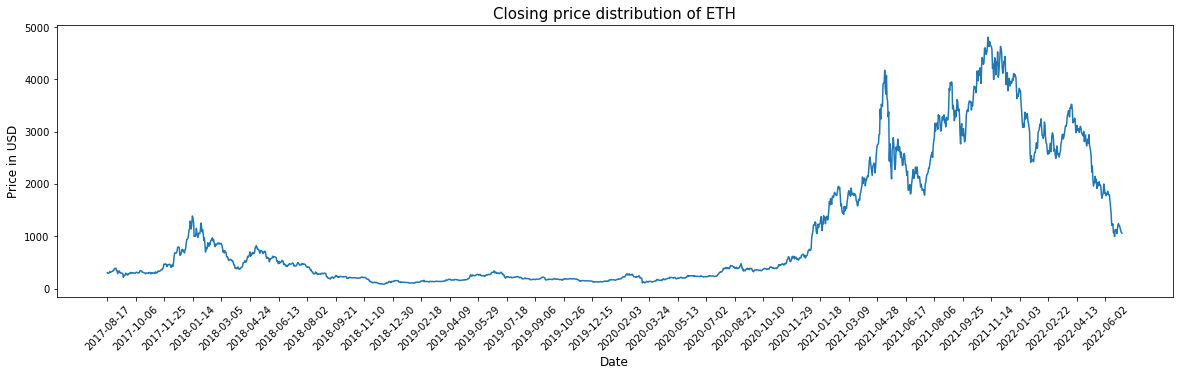

<Figure size 720x72 with 0 Axes>

<class 'pandas.core.frame.DataFrame'>
            Change_close
Date                    
2017-08-17          0.00
2017-08-18         -8.04
2017-08-19         -3.05
2017-08-20          8.19
2017-08-21         24.19


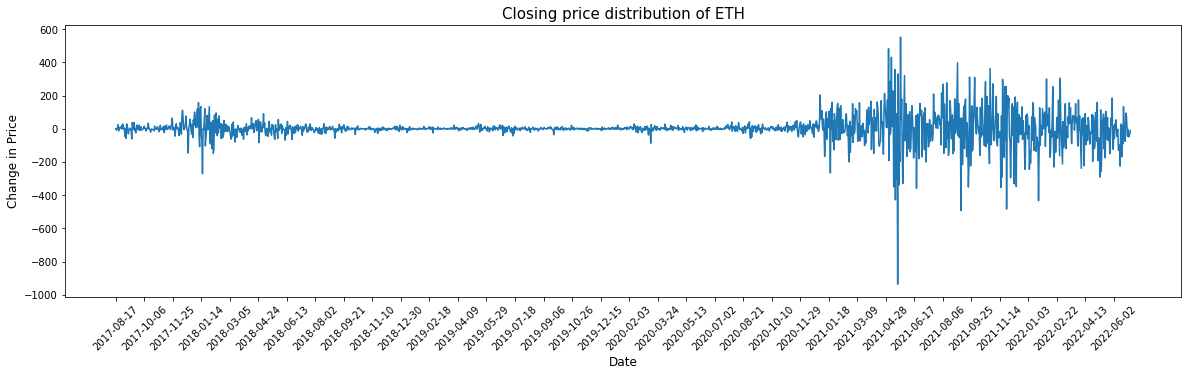

<Figure size 720x72 with 0 Axes>

In [12]:
plot_train(train)

In [13]:
train = train.set_index('Date')

In [14]:
train.head()

,Close,Change_close,Norm_Change_close
Date,,,
2017-08-17,302.00,0.00,NaN
2017-08-18,293.96,-8.04,0.623650
2017-08-19,290.91,-3.05,0.627003
2017-08-20,299.10,8.19,0.634556
2017-08-21,323.29,24.19,0.645307


In [15]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

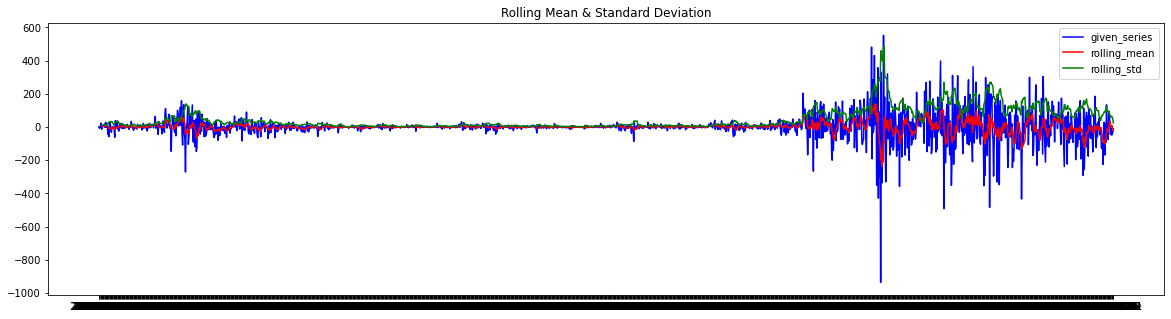

Results of Dickey-Fuller Test:
Test Statistic                -1.033427e+01
p-value                        2.790312e-18
#Lags Used                     1.600000e+01
Number of Observations Used    1.763000e+03
Critical Value (1%)           -3.434065e+00
Critical Value (5%)           -2.863181e+00
Critical Value (10%)          -2.567644e+00
dtype: float64


In [16]:
test_for_stationary(train['Change_close'])

In these plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as: the Lag values are identified from PACF and ACF plots for Autoregression(AR) and Moving Average(MA) parameters, p and q respectively p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2, The PACF shows a significant lag on day 2

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train['Change_close'], nlags=30)
lag_pacf = pacf(train['Change_close'], nlags=50, method='ols')

In [ ]:
#Plot ACF: q = 2
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train['Change_close'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train['Change_close'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [ ]:
#Plot PACF: p = 2
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train['Change_close'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train['Change_close'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
plot_acf(train['Change_close'], ax=pyplot.gca(),lags=30)
pyplot.show()


In [ ]:
plot_pacf(train['Change_close'], ax=pyplot.gca(), lags=30)
pyplot.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# AR - PACF - p 1,2,6,10

model = ARIMA(train['Change_close'], order=(30, 1, 0))  
results_AR = model.fit()  
plt.plot(train['Change_close'])
plt.plot(results_AR.fittedvalues, color='red', label = 'order 30')
RSS = results_AR.fittedvalues-train['Change_close']
RSS.dropna(inplace=True)
plt.xticks(np.arange(0, len(train['Change_close'])+1, 50),rotation = 45)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')
print(results_AR.summary())

In [ ]:
results = results_AR.predict(start=1780 ,end=1799).to_frame()
test['Forecast_AR'] = results['predicted_mean'].values
test = test.set_index('Date')

In [ ]:
test.head()

In [ ]:
test[['Change_close','Forecast_AR']].plot(figsize=(12,8))


In [ ]:

# MA model ACF - p 1,2,6,10
model = ARIMA(train['Change_close'], order=(0, 1,2)) 
results_MA = model.fit()  
plt.plot(train['Change_close'])
plt.plot(results_MA.fittedvalues, color='red')
RSS = results_MA.fittedvalues-train['Change_close']
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
print(results_MA.summary())

In [ ]:
results = results_MA.predict(start=1780 ,end=1799).to_frame()
test['Forecast_MA'] = results['predicted_mean'].values
test[['Change_close','Forecast_MA']].plot(figsize=(12,8))

In [ ]:
model = ARIMA(train['Change_close'], order=(7, 1, 7))  
results_ARIMA = model.fit()  
plt.plot(train['Change_close'])
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p =17, q =31')
RSS =results_ARIMA.fittedvalues-train['Change_close']
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.xticks(np.arange(0, len(train['Change_close'])+1, 50),rotation = 45)
plt.legend(loc='best')
print(results_ARIMA.summary())

In [ ]:
results = results_ARIMA.predict(start=1780 ,end=1799).to_frame()
test['Forecast_ARIMA'] = results['predicted_mean'].values
test[['Change_close','Forecast_ARIMA']].plot(figsize=(12,8))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

def arima_model(arima_data,feature,test):
    print(arima_data.head(2))
    arima_data.index = pd.to_datetime(arima_data.index )

    decompose_data = seasonal_decompose(arima_data, model="additive")
    decompose_data.plot()
    seasonality=decompose_data.seasonal
    seasonality.plot(color='green');

    model = ARIMA(arima_data,order=(7,1,7))
    history = model.fit()

    print(history.summary())

    results = history.predict(start=1780 ,end=1799).to_frame()
    results['Date'] = results.index

    print(results.head())
    test['Forecast_ARIMA2'] = results['predicted_mean'].values
    print(test.head(5))
    test[[feature,'Forecast_ARIMA2']].plot(figsize=(12,8))




In [ ]:
arima_model(train['Change_close'],'Change_close',test)

In [ ]:
train.tail()

In [ ]:
test.head(2)

In [ ]:
test['PR_Close_ARIMA']  = test['Forecast_ARIMA'].add(1,fill_value=0).cumprod()*2962.39

In [ ]:
test.head(20)

In [ ]:
test[['Close','PR_Close_ARIMA']].plot(figsize=(12,8))